In [3]:
import torch
import pickle
from matplotlib import pyplot as plt
import numpy as np
import pysr
import pickle

In [11]:
# version = 87804
# version = 72872
# version = 80525
version = 15579
results_path = f'results/{version}.pkl'
reg = pickle.load(open(results_path, 'rb'))
assert len(reg.equations_) == 2
results = reg.equations_[0]  # equations for predicting the mean

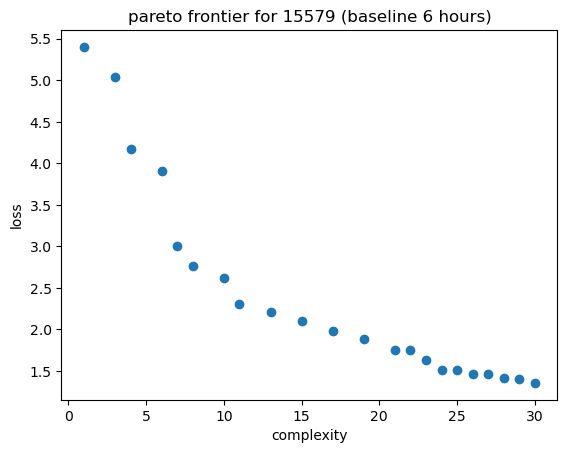

In [13]:
# plot the pareto curve for results
x = results['complexity']
y = results['loss']
# plot the pareto frontier
plt.scatter(x, y)
plt.xlabel('complexity')
plt.ylabel('loss')
# plt.ymin(1.0)
# plt.ymax(6.0)
plt.title(f'pareto frontier for {version} (baseline 6 hours)')
plt.savefig(f'pareto_{version}.png')
plt.show()



In [14]:
labels = ['time', 'e+_near', 'e-_near', 'max_strength_mmr_near', 'e+_far', 'e-_far', 'max_strength_mmr_far', 'megno', 'a1', 'e1', 'i1', 'cos_Omega1', 'sin_Omega1', 'cos_pomega1', 'sin_pomega1', 'cos_theta1', 'sin_theta1', 'a2', 'e2', 'i2', 'cos_Omega2', 'sin_Omega2', 'cos_pomega2', 'sin_pomega2', 'cos_theta2', 'sin_theta2', 'a3', 'e3', 'i3', 'cos_Omega3', 'sin_Omega3', 'cos_pomega3', 'sin_pomega3', 'cos_theta3', 'sin_theta3', 'm1', 'm2', 'm3', 'nan_mmr_near', 'nan_mmr_far', 'nan_megno']

# not all of these labels are actually used. for training, these inputs are zeroed out, but still passed in as zeroes.
# ideally, the linear layer ignores them, which does happen if i do l1 regularization to it
skipped = ['nan_mmr_near', 'nan_mmr_far', 'nan_megno', 'e+_near', 'e-_near', 'max_strength_mmr_near', 'e+_far', 'e-_far', 'max_strength_mmr_far', 'megno']


In [15]:
better_names = ['m_' + labels[i] for i in range(len(labels))] + ['s_' + labels[i] for i in range(len(labels))]

In [16]:
# for each equation in reg.equations_[0]['equation'], find and replace 'm{i}' with 'm_{labels[i]', and 's{i}' with 's_{labels[i]}'
for eq_ix in range(len(results['equation'])):
    for i in range(len(labels)):
        results.at[eq_ix, 'equation'] = reg.equations_[0]['equation'][eq_ix].replace('m{}'.format(i), 'm_{}'.format(labels[i]))
        results.at[eq_ix, 'equation'] = reg.equations_[0]['equation'][eq_ix].replace('s{}'.format(i), 's_{}'.format(labels[i]))

In [17]:
# dont print columns 'sympy_format' and 'lambda_format'
results.drop(columns=['sympy_format', 'lambda_format'])

,complexity,loss,score,equation
0,1,5.402001,0.000000,7.1049724
1,3,5.038410,0.034839,(7.255673 - s_e-_far)
2,4,4.172633,0.188543,(4.357901 - log(s_e-_far))
3,6,3.911571,0.032304,((4.914717 - log(s_e-_far)) - s_time)
4,7,3.006888,0.263033,(7.804912 / ((1.0793283 ^ m_e+_near1) + s_e-_f...
5,8,2.762748,0.084680,((4.2415876 - log(s_e-_far)) / (1.0758355 ^ m_...
6,10,2.623418,0.025874,(((3.6163602 - log(s_e-_far)) / (1.085188 ^ m_...
7,11,2.307699,0.128227,(4.405616 + log(log((s_e-_far ^ m_e+_near1) + ...
8,13,2.203326,0.023142,((3.859761 + log(log(1.2568761 + (s_e-_far ^ m...
9,15,2.099159,0.024216,(4.4096103 + log((log((s_e-_far ^ m_e+_near1) ...


In [18]:
for i in range(len(results)):
    print(i, results['equation'][i])

0 7.1049724
1 (7.255673 - s_e-_far)
2 (4.357901 - log(s_e-_far))
3 ((4.914717 - log(s_e-_far)) - s_time)
4 (7.804912 / ((1.0793283 ^ m_e+_near1) + s_e-_far))
5 ((4.2415876 - log(s_e-_far)) / (1.0758355 ^ m_e+_near1))
6 (((3.6163602 - log(s_e-_far)) / (1.085188 ^ m_e+_near1)) + s_e+_near8)
7 (4.405616 + log(log((s_e-_far ^ m_e+_near1) + 1.2818813) / s_e-_far))
8 ((3.859761 + log(log(1.2568761 + (s_e-_far ^ m_e+_near1)) / s_e-_far)) + s_e+_near8)
9 (4.4096103 + log((log((s_e-_far ^ m_e+_near1) - -1.2336203) / (1.2521548 ^ m_max_strength_mmr_far)) / s_e-_far))
10 ((4.4096103 + log(log((s_e-_far ^ m_e+_near1) + 1.2113905) / s_e-_far)) - ((m_max_strength_mmr_far + m_e+_near7) * 0.25348958))
11 ((3.9264505 + log(log((s_e-_far ^ m_e+_near1) - -1.173845) / s_e-_far)) + (s_e+_near8 - ((m_max_strength_mmr_far + m_e+_near7) * 0.25348958)))
12 ((4.357901 + log(log((s_e-_far ^ m_e+_near1) - -1.235911) / s_e-_far)) - ((((-0.80601984 + s_e+_near8) * m_e-_far) + m_max_strength_mmr_far) * 0.24250071))
